In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline


In [26]:
holidays_df = pd.read_csv("C:/Users/Babayeju/Desktop/Github/Holiday_EDA/travelanalysis.csv")

In [27]:
holidays_df.head()

,rundate,report_period,region_num,foreign_region,foreign_country,uk_group,uk_apt,foreign_apt,ty_total,ty_sch,ty_char,ly_total,ly_sch,ly_char,pc_change
0,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,GATWICK,INNSBRUCK,131247,109163,22084,9300,8230,1070,1311.25806
1,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,GATWICK,SALZBURG,48452,35061,13391,1858,1544,314,2507.75027
2,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,GATWICK,VIENNA,203487,203425,62,106,106,0,191868.86790
3,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,HEATHROW,INNSBRUCK,36025,36025,0,2541,2541,0,1317.74892
4,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,HEATHROW,SALZBURG,26813,26813,0,2419,2419,0,1008.43324


In [28]:
holidays_df.nunique()



rundate               1
report_period         1
region_num           21
foreign_region       21
foreign_country     124
uk_group              2
uk_apt               42
foreign_apt         551
ty_total           2260
ty_sch             1868
ty_char             869
ly_total           1770
ly_sch             1508
ly_char             607
pc_change          1721
dtype: int64

In [29]:
fc_total = holidays_df.groupby('foreign_country')['ty_total'].sum()
fc_total.head(50)


foreign_country
AFGHANISTAN                  0
ALBANIA                 487235
ALGERIA                  96603
ANTIGUA AND BARBUDA     183457
ARGENTINA               124981
ARMENIA                     99
ASCENSION ISLAND           627
AUSTRALIA               473482
AUSTRIA                1736370
AZERBAIJAN               33801
BAHAMAS                  62347
BAHRAIN                 458203
BANGLADESH              211432
BARBADOS                565327
BELARUS                      0
BELGIUM                 987940
BERMUDA                  86930
BOSNIA-HERZEGOVINA       23071
BRAZIL                  484123
BRUNEI                   30963
BULGARIA               1648163
CANADA                 2689175
CAPE VERDE ISLANDS      367755
CAYMAN ISLANDS           64110
CHILE                    60144
CHINA                    37928
COLOMBIA                125965
COSTA RICA               66753
CROATIA                1627719
CUBA                     55105
CYPRUS                 2792079
CZECH REPUBLIC         

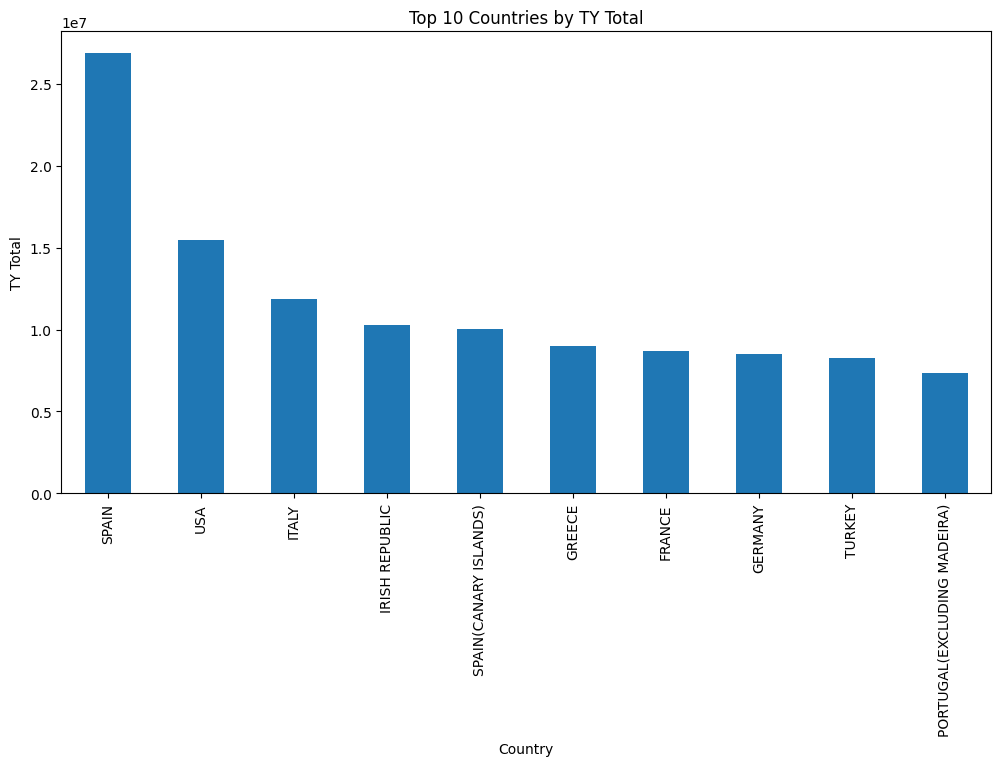

In [31]:
# Sort the values in descending order and select the top 10
fc_total_top10 = fc_total.sort_values(ascending=False).head(10)

# Plot the data using pandas built-in functionality
fc_total_top10.plot(kind='bar', figsize=(12, 6))

# Give the plot a title and label the axes
plt.title('Top 10 Countries by TY Total')
plt.xlabel('Country')
plt.ylabel('TY Total')


# Show the plot
plt.show()

In [35]:
# Assuming 'foreign_apt' and 'ty_total' are columns in your DataFrame

# Group by 'foreign_country' and 'foreign_apt', and sum 'ty_total'
apt_total = holidays_df.groupby(['foreign_country', 'foreign_apt'])['ty_total'].sum().reset_index()

# Sort the data within each 'foreign_country' by 'ty_total' in descending order
apt_total = apt_total.sort_values(['foreign_country', 'ty_total'], ascending=[True, False])

# Select the top 10 countries
top_countries = fc_total_top10.index.tolist()

# Filter data to include only the top 10 countries
apt_total_top10 = apt_total[apt_total['foreign_country'].isin(top_countries)]

# For each country, select the top 5 'foreign_apt'
top5_apt_per_country = apt_total_top10.groupby('foreign_country').head(5)
top5_apt_per_country.head(50)
# Now 'top5_apt_per_country' is a DataFrame with the top 5 'foreign_apt' for each of the top 10 'foreign_country'


,foreign_country,foreign_apt,ty_total
145,FRANCE,PARIS (CHARLES DE GAULLE),2970367
143,FRANCE,NICE,1312469
139,FRANCE,MARSEILLE,561522
119,FRANCE,BORDEAUX,541805
159,FRANCE,TOULOUSE (BLAGNAC),528811
174,GERMANY,FRANKFURT MAIN,2220454
165,GERMANY,BERLIN BRANDENBURG,1688853
184,GERMANY,MUNICH,1537675
171,GERMANY,DUSSELDORF,755356
177,GERMANY,HAMBURG,704636


In [46]:
import plotly.offline as pyo
import plotly.graph_objects as go


# Create a list to store traces
data = []

# Create a trace for each 'foreign_apt'
for apt in top5_apt_per_country['foreign_apt'].unique():
    apt_df = top5_apt_per_country[top5_apt_per_country['foreign_apt'] == apt]
    trace = go.Bar(
        x=apt_df['foreign_country'],
        y=apt_df['ty_total'],
        name=apt,
        text=apt_df['ty_total'],
        textposition='auto'
    )
    data.append(trace)

# Define layout
layout = go.Layout(
    barmode='stack',
    title='Top 5 Foreign APT per Country',
    xaxis=dict(title='Country'),
    yaxis=dict(title='TY Total')
)

# Create figure and add data
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(categoryorder ='total ascending')

# Write the plot to an HTML file and open it in a web browser
pyo.plot(fig, filename='stacked_bar_chart.html', auto_open=True)


'stacked_bar_chart.html'